<a href="https://colab.research.google.com/github/ish66726-a11y/Quant-Finance-Fundamentals/blob/main/notebooks/06%E3%83%A9%E3%83%B3%E3%83%80%E3%83%A0%E6%80%A7%E3%81%AE%E5%8F%96%E3%82%8A%E6%89%B1%E3%81%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6 ファイナンスにおけるランダム性

#6-1分析手法の種類

##1. ファンダメンタル分析（Fundamental Analysis）

企業そのものを詳しく調査し、本質的価値（Intrinsic Value）に対して株価が割安かどうかを判断する手法。

#### 主な分析対象
- 経営陣
- 製品・サービス
- 資産（現金・設備など）
- 負債（借金・ローン）
- 損益計算書（収益・費用）
- 貸借対照表
- キャッシュフロー計算書

#### 重要指標：PER（株価収益率）
-  純利益 ÷ 発行済株式数 = EPS  
-  株価 ÷ EPS = PER  → **低いほど割安**と判断されやすい



#### 特徴
- 本質的価値を重視  
- 需給がすぐに反映されない場合、正しく割安でも株価が上がらないこともある  
- 長期投資向けの手法

---

##2. テクニカル分析（Technical Analysis）

企業の情報は株価にすべて反映されていると仮定し、**過去の価格データから未来を予測する手法**。

#### 主な手法
- 移動平均線（SMA）
- RSI（相対力指数）
- AR / ARIMA モデル
- ロジスティック回帰、SVM、DNN などの機械学習モデル

#### 基本概念
> 過去に見られたパターンは将来も繰り返される  
→ 過去データから未来の動きを予測する

#### 特徴
- チャートの形やパターンを重視  
- 企業の財務情報は直接見ない  
- 短期〜中期取引に有効

---

##3. クオンツ分析（Quantitative Analysis）

高度な数学と確率論を用いて、金融商品のランダムな動きをモデル化する手法。

#### 必要となる数学
- 統計学
- 確率論
- 確率過程
- 確率微分方程式（SDE）
- 確率解析

#### 特徴
- 資産のランダム性を前提とする  
- ポートフォリオ最適化などでリスクを最小化  
- モデル例：Black–Scholes方程式（オプション価格計算）

---

### まとめ

| 手法 | 何を見る？ | 主な特徴 |
|------|------------|-----------|
| ファンダメンタル分析 | 企業の価値・財務 | 割安/割高を判断、長期向け |
| テクニカル分析 | 過去の価格データ | パターン分析で未来を予測、短期向け |
| クオンツ分析 | 数学モデル・確率過程 | ランダム性を数式化、高度で精密 |



#6-2 資産のランダム性（確率的挙動）



##1. なぜランダム性を仮定するのか？

クオンツ分析では、**株価・金利・オプション価格などはランダムに動く**と仮定する。

その理由は、実際の市場データ（特に**日次リターン**）を調べると、以下のような特徴があるため：

- 日次リターン = (今日の株価 − 昨日の株価) ÷ 昨日の株価
- 日次リターンのヒストグラムを描画すると  → **平均0の正規分布に非常に近い形状**になる
- 月次リターンでも同様の傾向がある

正規分布は **「平均」「分散（または標準偏差）」** の 2 つのパラメータで特徴付けられる。

→ **リターンは正規分布からの乱数とみなせる**  という結論に至る。

---

##2. リターンをランダム変数として表す

リターン $ R $ は次のように表せる：

$$
R = \mu + \sigma \varepsilon
$$

- $ \mu $：平均
- $ \sigma $：標準偏差
- $ \varepsilon $：正規分布からの乱数（$\varepsilon \sim \mathcal{N}(0,1)$）

これは日次リターンが正規分布に従うという観察に基づいている。

---

##3. 正規分布がよく現れる理由（中心極限定理）

複数の独立な確率変数を足し合わせると、その和は正規分布に近づく。

これが **中心極限定理（Central Limit Theorem）** である。

そのため金融市場だけでなく、物理・統計などあらゆる分野で正規分布が頻出する。

---

##4. 株価の変動もランダム変数で表す

リターンだけでなく **株価そのものの未来値もランダム変数** として扱える。

例：

- 今日の株価：$ S_t $
- 明日の株価：$ S_{t+1} $  
  → **正規分布からの乱数**として扱える

これが **Wiener過程（Wiener Process）** を使ったモデル化の考え方につながる。

---

##5. Wiener過程の特徴

Wiener過程は：

- **連続的なパスを持つ**
- **増分が独立で、かつ正規分布に従う**

株価の変化をこのプロセスでモデル化するのは、「日次リターンが正規分布に従う」という経験的事実に基づく。

---

##6. 株価の大まかな振れ幅

将来の株価は不確実だが、次の範囲に収まる可能性が高い：

$$
\mu \pm 1 \sigma
$$

- 平均（トレンド）  
- ± 標準偏差（ノイズ）

多くの場合、株価はこのレンジ内で推移する。

---

##7. 今日の株価から明日の株価を予測する考え方

今日の株価を $ S_t $ とすると、明日の株価 $ S_{t+1} $ は：

$$
ln \frac{S_{t+1}}{S_t} \sim \mathcal{N}(\mu, \sigma^2 )
$$
よって、
$$S_{t+1} = S_t exp(\mu +\sigma\varepsilon)$$
つまり 株価は正規分布ではなく、対数正規分布に従う。これがクオンツ分析の基本的な前提となる。



#6-3 金融資産の数学的背景：Wiener過程とランダムウォーク


##1. 株価そのものは正規分布に従わない理由

-  理由1：株価は負の値を取れない  
正規分布は負の値が出る → モデルとして破綻。

- 理由2：株価には長期的な上昇トレンドがある  
トヨタ、Sony、任天堂 などの株価は **長期では上昇し続ける傾向** にある。

  → 完全なランダムウォーク（通常の正規分布）では説明できない。

---

## 2. 株価は対数正規分布に従う

クオンツ分析では、株価 $S_t$ そのものではなく、**株価の対数変化** を確率変数としてモデル化する。

今日の株価を $S_t$ とすると、明日の株価 $S_{t+1}$ に対する **対数リターン** は次のように表される：

$$
\ln \frac{S_{t+1}}{S_t} \sim \mathcal{N}(\mu, \sigma^2)
$$

したがって、株価の更新式は：

$$
S_{t+1} = S_t \exp(\mu + \sigma \varepsilon),
\quad \varepsilon \sim \mathcal{N}(0,1)
$$

このとき、株価 $S_{t+1}$ は、**正規分布ではなく対数正規分布** に従う。

この仮定により：

- 株価は常に正の値を取る  
- 長期的に指数関数的な成長が可能  
- 株価が大きくなるほど変動も大きくなる  

といった、実際の市場の特徴を自然に説明できる。

このモデル化が、クオンツ分析における  **最も基本的な前提のひとつ** である。


---

##3. 株価変動は「トレンド + ノイズ」
$$
S_{t+1} = S_t \exp(\mu + \sigma \varepsilon)
$$

というモデルでは、株価の変動は **ドリフト部分** と **拡散部分** に分けて解釈できる。

株価の動きは以下の 2 つの要素から構成される：

1. **ドリフト部分（トレンド）**  
   → 長期的な平均成長率を表すパラメータ $\mu$

2. **拡散部分（ノイズ）**  
   → 価格変動の大きさを表すパラメータ $\sigma$ （ボラティリティ）


このように、対数リターンは「トレンド + ノイズ」として捉えられる。


---

##4. Wiener過程の性質
ここで問題となるのは、

> この「ランダムなノイズ」を   どのような確率過程で表すか

である。

クオンツ分析では、この確率的な揺らぎを **Wiener過程（Wiener process）**  によってモデル化する。

Wiener過程 $W_t$ の増分は、次の性質を持つ：

$$
W_{t+\Delta t} - W_t \sim \mathcal{N}(0, \Delta t)
$$

- 増分は互いに独立  
- 増分は正規分布に従う  
- サンプルパスは連続  

このように、Wiener過程は「平均0の純粋なノイズ」を表す確率過程であり、株価変動のランダム成分を記述するための基礎となる。

---

##5. 幾何ブラウン運動（Geometric Brownian Motion: GBM）

金融工学で最も重要なSDE（確率微分方程式）はこれ：

$$ dS_t = \mu S_t \, dt + \sigma S_t \, dW_t $$

意味：

- $dS_t$：株価の微小変化  
- $dW_t$：正規分布 $\mathcal{N}(0, dt)$ に従う増分
- $\mu S_t dt$：トレンド  
- $\sigma S_t dW_t$：ノイズ（ボラティリティ）  
---
##6. 株価が大きいほど変動が大きくなる理由

幾何ブラウン運動

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$

において、確率的変動を表す項は、$\sigma S_t dW_t$ である。

この式から分かるように、株価の変動幅は

$$
\text{変動幅} \propto S_t
$$

となる。

すなわち、株価が大きくなるほど、絶対的な変動も自然に大きくなる。

これは、実際の市場において、高価格帯の株ほど値動きが大きくなるという、経験的事実と一致している。

---

##7. 現代金融モデルへの応用

この幾何ブラウン運動

$$
dS_t = \mu S_t \, dt + \sigma S_t \, dW_t
$$

は、現代金融工学の中心的なモデルであり、

- Black–Scholesモデル  
- 金利モデル（Vasicek など）  
- 各種デリバティブの価格付け理論  

といった多くの理論の基盤となっている。



#6-4 Wiener過程とランダムウォークのシミュレーション
##1. 株価そのものではなく「過程」をモデル化する理由

株価の動きを連続時間で変化する確率的な対象として扱うため、クオンツ分析では **確率過程** を用いる。

その代表例が：

- ランダムウォーク（離散時間モデル）  
- Wiener過程（連続時間モデル）  

である。

Wiener過程（ブラウン運動）は、ランダムウォークを時間刻みを無限に小さくした**連続時間極限** として定義される。

Wiener過程 $W(t)$ は次の性質を持つ：

- 増分は独立  
- 増分は正規分布に従う  

すなわち、任意の $\Delta t > 0$ に対して：

$$
W(t+\Delta t) - W(t) \sim \mathcal{N}(0, \Delta t)
$$

---


## 2. 数値シミュレーションの基本アイデア

連続時間の確率過程は、そのままではコンピュータ上で扱えない。  
そこで、小さな時間刻み $dt$ を用いて近似する。

基本的な手順は次の通り：

1. 標準正規乱数 $Z \sim \mathcal{N}(0,1)$ を生成  
2. Wiener過程の増分を  
   $$
   dW = \sqrt{dt} \times Z
   $$
   として計算  
3. 初期値 $W(0)=0$ を与え、増分を累積することで  
   $W(t)$ のパスを構築する  

この方法により、Wiener過程のサンプルパスを数値的にシミュレーションできる。

---

## 3. Python実装：Wiener過程クラス

以下に示す **WienerProcess** クラスは、Wiener過程の生成と可視化を目的とする。

### 特徴
- 時間刻み $dt$ とステップ数 $N$ を指定  
- `generate_path`：Wiener過程のパスを生成  
- `plot_path`：生成したパスを可視化  
---

## 4. Python実装例

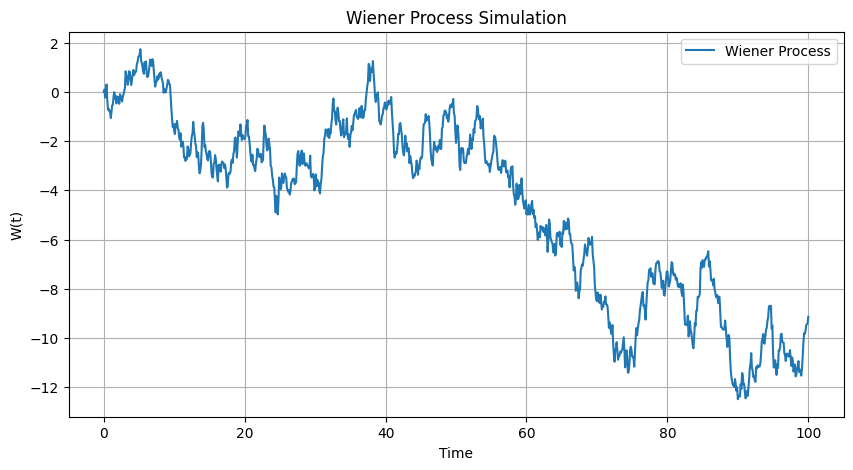

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class WienerProcess:
    def __init__(self, dt=0.1, N=1000, seed=None):
        """
        dt   : 時間刻み幅 Δt
        N    : ステップ数（合計時間は N * dt）
        seed : 乱数シード（再現性のため任意で指定）
        """
        self.dt = float(dt)
        self.N = int(N)

        # 乱数生成器（NumPy推奨方式）
        self.rng = np.random.default_rng(seed)

        self.t = None
        self.W = None

    def generate_path(self):

        # ----- ① 時間軸 -----
        self.t = np.linspace(0.0, self.N * self.dt, self.N + 1)

        # ----- ② 標準正規乱数 -----
        Z = self.rng.standard_normal(self.N)

        # ----- ③ 増分 dW -----
        dW = np.sqrt(self.dt) * Z

        # ----- ④ 累積和 -----
        self.W = np.empty(self.N + 1, dtype=float)
        self.W[0] = 0.0
        self.W[1:] = np.cumsum(dW)

        return self.t, self.W

    def plot_path(self):

        if self.W is None or self.t is None:
            self.generate_path()

        plt.figure(figsize=(10, 5))
        plt.plot(self.t, self.W, label="Wiener Process")
        plt.xlabel("Time")
        plt.ylabel("W(t)")
        plt.title("Wiener Process Simulation")
        plt.grid(True)
        plt.legend()
        plt.show()


# ====================================
# 実行部分
# ====================================

process = WienerProcess(dt=0.1, N=1000, seed=42)
process.plot_path()


---
## 5. 株価モデルとしての評価

Wiener過程には次のような特徴（欠点）がある：

- 値が正にも負にもなり得る  
- 長期的なトレンドは 0  
- ランダムでギザギザした動きをする  

一方、実際の株価には次の性質がある：

- 負の値を取らない（最小値は 0）  
- 長期的に上昇トレンドを持つ  
- 株価が高いほど変動（ボラティリティ）も大きくなる  

したがって、**Wiener過程そのものは株価モデルとして不適切である。**

---

## 6. 幾何ブラウン運動（GBM）

ここまでで、Wiener過程・トレンド・ボラティリティという
要素を個別に見てきた。

これらをすべて組み合わせたものが、
**幾何ブラウン運動（Geometric Brownian Motion: GBM）**
である。

幾何ブラウン運動は、次の確率微分方程式で定義される：

$$
dS_t
=
\underbrace{\mu S_t\,dt}_{\text{ドリフト項}}
+
\underbrace{\sigma S_t\,dW_t}_{\text{拡散項}}
$$

ここで：

- $dS_t$：株価の微小な変化  
- $\mu S_t dt$：長期的な平均成長を表す **ドリフト項**  
- $\sigma S_t dW_t$：不確実性を表す **拡散項**  
- $W_t$：Wiener過程（平均0・分散$t$の確率過程）

である。

重要なのは、**GBMはWiener過程そのものではない**という点である。
Wiener過程 $W_t$ は「純粋なノイズ」を表すのに対し、
GBMはそのノイズを株価水準 $S_t$ に比例させ、
さらにドリフト項を加えた **株価専用の確率過程**である。

したがって、

- Wiener過程：ランダム性の源  
- $\mu$：長期的な成長率  
- $\sigma$：変動の大きさ  

をすべて含んだ

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

この式全体を **幾何ブラウン運動（GBM）** と呼ぶ。

GBMは、

- 株価が負にならない  
- 長期的な成長トレンドを持つ  
- 株価水準に比例した変動を表現できる  

という特徴を持ち、現代金融工学における
**標準的な株価モデル**として用いられている。

---

## 7. まとめ

- 対数リターンは正規分布で近似できる  
- Wiener過程は最も基本的な確率過程  
- numpy の累積和で容易にシミュレーション可能  
- しかし株価を表すには不十分（負値・トレンドがない）  
- そのため、**幾何ブラウン運動（GBM）** が株価モデルとして用いられる  


#6-5 伊藤計算と確率変数の微分

## 1. 普通の関数（確定変数）の微分

まず、確定変数 $x$ をもつ通常の関数を考える。

例：  
$$f(x) = x^2$$

この微分は：

$$\frac{df}{dx} = 2x$$

小さな変化 $dx$ に対する変化は、

$$df = 2x\,dx$$

これは普通の微分の公式であり、関数が確定的で、$x$ がランダムでない場合に成り立つ。

---

## 2. 確率変数（Wiener過程）を含む場合はどうなるか？

今度は $x$ が **確率変数**、特に
Wiener過程 $W_t$ のような確率過程である場合を考える。

Wiener過程の増分は次の性質を持つ：

- 平均 0、分散 $dt$ の正規分布  
- すなわち  
  $$
  dW \sim \mathcal{N}(0, dt)
  $$

ここで次の問題が生じる。

> 通常の微分法則  
> $df = f'(x)\,dx$  
> はそのまま使えるだろうか？

**答えは使えない。**

理由は、$W_t$ が確率変数であり、
その増分 $dW$ がランダムであるだけでなく、

$$
(dW)^2 = dt
$$

という、通常の微分では現れない
**特殊な性質**を持つためである。

---

## 3. 伊藤の補題（Itô's Lemma）

確率過程 $X_t$ が次の確率微分方程式に従うとする：

$$
dX_t = a(X_t, t)\,dt + b(X_t, t)\,dW_t
$$

このとき、$F(X_t, t)$ の微小変化は
**伊藤の補題**により次で与えられる：

$$
\begin{aligned}
dF
&=
\frac{\partial F}{\partial t}\,dt
+
\frac{\partial F}{\partial X}\,dX_t
+
\frac{1}{2}
\frac{\partial^2 F}{\partial X^2}
(dX_t)^2
\\
&=
\frac{\partial F}{\partial t}\,dt
+
\frac{\partial F}{\partial X}\,dX_t
+
\frac{1}{2}
\frac{\partial^2 F}{\partial X^2}
\, b^2(X_t,t)\,dt
\end{aligned}
$$

ここで、Wiener過程の性質

- $\mathbb{E}[dW] = 0$
- $(dW)^2 = dt$

を用いている。

#### 通常の微分との決定的な違い

- 古典的微分では $(dx)^2$ は無視される  
- 確率微分では  
  $$
  (dW)^2 = dt
  $$
  が残る  

この **2次項が消えない** ことが、
伊藤解析の最大の特徴である。


---
##4. 計算例：伊藤の補題を実際に使ってみる

伊藤の補題が通常の微分とどのように異なるかを確認するため、
最も単純な例を考える。



#### ①設定



確率過程として

$$
X_t = W_t
$$

を取る。  
すなわち、

$$
dX_t = dW_t
$$

であり、ドリフト項は存在しない。


#### ②関数の定義
$$
F(X) = X^2
$$

このとき、

- 1次微分  
  $$
  \frac{\partial F}{\partial X} = 2X
  $$

- 2次微分  
  $$
  \frac{\partial^2 F}{\partial X^2} = 2
  $$



#### ③伊藤の補題を適用

伊藤の補題

$$
dF
=
\frac{\partial F}{\partial X}\,dX_t
+
\frac{1}{2}
\frac{\partial^2 F}{\partial X^2}
(dX_t)^2
$$

に代入すると：

$$
dF
=
2X\,dW
+
\frac{1}{2}\cdot 2 \cdot (dW)^2
$$

ここで、Wiener過程の性質

$$
(dW)^2 = dt
$$

を用いると、

$$
dF = 2X\,dW + dt
$$


#### ④結果の解釈

通常の微分であれば

$$
d(X^2) = 2X\,dX
$$

となるが、確率微分では**2次の微小項が消えずに $dt$ として残る**。

これが、通常の微分と確率微分の決定的な違いであり、伊藤解析の核心である。


---
## 5. まとめ

- 普通の微分では 1次の微小項だけが残る  
- Wiener過程では $(dW)^2 = dt$ が残るため 2次項が重要  
- これを体系化したのが **伊藤の補題**  
- 金融工学では必須の道具  






# 6-6 高次元伊藤の補題とBlack–Scholes方程式の導入

## 1. なぜ確率微分方程式（SDE）が必要なのか？

オプション価格を

$$
V = V(S,t)
$$

と表す。

- 満期 $t=T$ ではオプションの価値は確定している  
  例（コールオプション）：
  $$
  V(S_T, T) = \max(S_T - K, 0)
  $$

- しかし知りたいのは **満期前 $t<T$ の価格 $V(S,t)$**  

このとき、

- 株価 $S_t$ は確率過程  
- よって $S_t$ に依存する $V(S,t)$ も確率過程  

となる。

したがって、オプション価格の時間変化を扱うためには、**確率微分方程式（SDE）と伊藤の補題** が不可欠となる。

---

## 2. 株価のモデル（一次元 SDE）

株価 $S$ は次の SDE に従うとする：

$$
dS = a\,dt + b\,dW
$$

ここで、

- $a = \mu S$（ドリフト項：期待成長率）  
- $b = \sigma S$（拡散項：ボラティリティ）  

ただし以降の導出を簡潔にするため、$a, b$ を一般的な関数としてそのまま用いる。

---

## 3. オプション価格は 2 変数の確率関数

オプション価格は、

- 株価 $S$（確率変数）  
- 時間 $t$（確定変数）  

の関数である：

$$
V = V(S,t)
$$

したがって $V$ の微小変化 $dV$ を求めるには、**多変数版の伊藤の補題** を用いる必要がある。

---

## 4. 多変数伊藤の補題（基本形）

伊藤の補題より、

$$
dV
=
V_t\,dt
+
V_S\,dS
+
\frac{1}{2}V_{SS}(dS)^2
$$

が成り立つ。

これは、通常の Taylor 展開と似ているが、**確率変数では 2 次項が消えない** 点が本質的に異なる。

---

## 5. なぜ $(dS)^2$ を無視できないのか？

株価の SDE：

$$
dS = a\,dt + b\,dW
$$

を 2 乗すると：

$$
(dS)^2 = (a\,dt + b\,dW)^2
$$

微小項の大小関係より、

- $(dt)^2$ は無視できる  
- $dt\,dW$ も無視できる  
- しかし $(dW)^2 = dt$ は **無視できない**

したがって、

$$
(dS)^2 \approx b^2(dW)^2 = b^2\,dt
$$

となる。

---

## 6. オプション価格の確率微分方程式

これを伊藤の式に代入すると：

$$
\begin{aligned}
dV
&=
V_t\,dt
+ V_S(a\,dt + b\,dW)
+ \frac{1}{2}V_{SS} b^2\,dt
\\
&=
\left(
V_t + aV_S + \frac{1}{2}b^2 V_{SS}
\right)dt
+
bV_S\,dW
\end{aligned}
$$

これは **オプション価格 $V(S,t)$ の確率微分方程式** である。

---

## 7. Black–Scholes方程式への接続

この式には確率項 $dW$ が含まれている。

Black–Scholesの核心は：

>株式とオプションを組み合わせた、**自己金融・無裁定ポートフォリオ** を構成し、$dW$ の項（リスク）を打ち消すことで、確率項を含まない **偏微分方程式（PDE）** を導く点にある。

この操作により、最終的に**Black–Scholes方程式** が得られる。

---

## 8. まとめ

- 株価 $S$ は確率過程  
- $S$ に依存するオプション価格 $V(S,t)$ も確率過程
- よって多変数の伊藤補題が必要  
- 確率微分では **2 次項 $(dS)^2$ が消えない**  
- $(dS)^2 = b^2 dt$ がBlack–Scholes方程式導出の鍵  

これが、伊藤解析が現代金融工学で不可欠な理由である。


# 6-7 幾何ブラウン運動（GBM）の確率微分方程式を伊藤の補題で解く

## 1. 幾何ブラウン運動（GBM）の定義

株価 $S_t$ の変化は次の確率微分方程式（SDE）で与えられる：

$$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t
$$

- $\mu$：ドリフト（平均成長率）
- $\sigma$：ボラティリティ
- $W_t$：Wiener過程（ブラウン運動）

この式を解いて、明示的な形の $S_t$ を得る。

---

## 2. まず式を「対数変換」する

両辺を $S_t$ で割る：

$$
\frac{dS_t}{S_t} = \mu\,dt + \sigma\,dW_t
$$

これより $d(\ln S_t)$ を伊藤の補題で計算すればよい。

そこで関数を

$$
f(S_t) = \ln S_t
$$

とおく。

---

## 3. 伊藤の補題（1変数版）を適用

伊藤の補題：

$$
df = f'(S_t)\,dS_t + \frac{1}{2} f''(S_t)\,(dS_t)^2
$$

ここで、

$$
f'(S_t) = \frac{1}{S_t},\qquad
f''(S_t) = -\frac{1}{S_t^2}
$$

---

## 4. $(dS_t)^2$ を計算する

$$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t
$$

を 2 乗すると、

$$
(dS_t)^2
= (\mu S_t\,dt + \sigma S_t\,dW_t)^2
\approx \sigma^2 S_t^2 (dW_t)^2
= \sigma^2 S_t^2 dt
$$

（$dt^2$ と $dt\,dW_t$ は無視でき、$(dW_t)^2 = dt$ のみ残る。）

---

## 5. 伊藤の補題に代入

$$
df = \frac{1}{S_t}(\mu S_t\,dt + \sigma S_t\,dW_t)
+ \frac{1}{2}\left(-\frac{1}{S_t^2}\right)\left(\sigma^2 S_t^2 dt\right)
$$

整理すると：

$$
d(\ln S_t)
= \left(\mu - \frac{1}{2}\sigma^2\right)dt + \sigma\,dW_t
$$

---

## 6. 両辺を積分して明示解を得る

$0$ から $t$ まで積分すると：

$$
\ln S_t - \ln S_0
= \left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma \int_0^t dW_u
$$

ここで、

$$
\int_0^t dW_u = W_t - W_0
$$

であり、通常 $W_0 = 0$ とおくので

$$
\int_0^t dW_u = W_t
$$

よって：

$$
\ln S_t - \ln S_0
= \left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma W_t
$$

両辺に指数をとると：

$$
S_t = S_0 \exp\left[\left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma W_t\right]
$$

---

## 7. 解の特徴

- 指数関数形のため常に正（負にならない）
- $\mu$ が長期的な平均成長を決める
- $\sigma$ が変動の大きさを決める
- したがって株価は **対数正規分布** に従う

---

## 8. まとめ

- GBM の SDE：
  $$
  dS_t = \mu S_t\,dt + \sigma S_t\,dW_t
  $$
- 伊藤の補題を $f(S_t)=\ln S_t$ に適用するのがポイント
- $(dW_t)^2 = dt$ により 2次項が残り、補正 $-\tfrac12\sigma^2$ が生じる
- 明示解：
  $$
  S_t = S_0 \exp\left[\left(\mu - \tfrac{1}{2}\sigma^2\right)t + \sigma W_t\right]
  $$


#6-8 幾何ブラウン運動（GBM）のPython実装

##1. GBM シミュレーションのアルゴリズム

1. **時間刻みを設定する**  
   $$
   dt = \frac{T}{N}
   $$

2. **時間軸を生成する**  
   $$
   t_i = i\,dt \quad (i = 0,1,\dots,N)
   $$

3. **各ステップで独立な標準正規乱数を生成する**  
   $$
   Z_j \sim \mathcal{N}(0,1)
   $$

4. **Wiener過程を累積和で構築する**  
   $$
   W_{t_i} = \sum_{j=1}^{i} \sqrt{dt}\, Z_j
   $$

5. **幾何ブラウン運動（GBM）の明示解を用いて株価を計算する**  
   $$
   S(t_i)
   =
   S_0
   \exp\left[
   \left(\mu - \tfrac{1}{2}\sigma^2\right)t_i
   + \sigma W_{t_i}
   \right]
   $$


---

##2. Python コード：幾何ブラウン運動（GBM）の実装

  

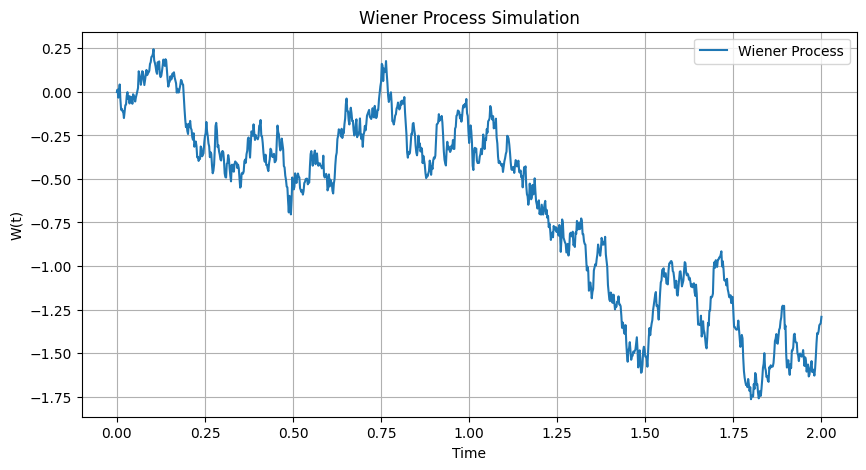

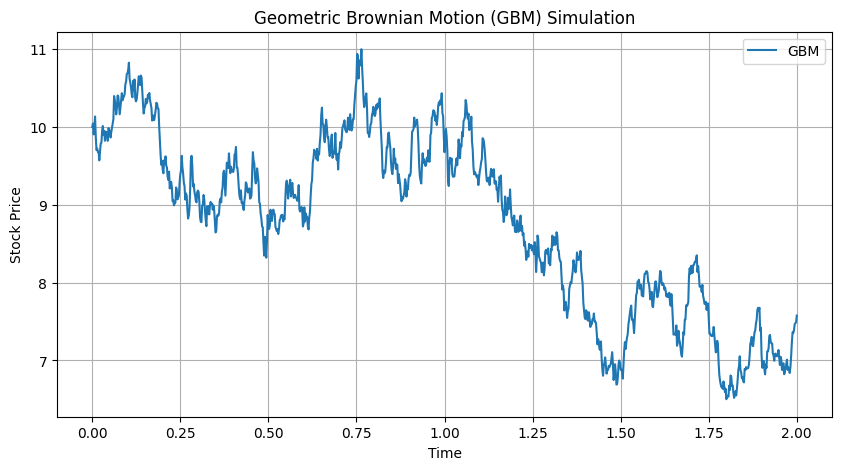

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
#  ウィーナー過程クラス
# =========================
class WienerProcess:
    def __init__(self, dt=0.1, N=1000, seed=None):
        """
        dt   : 時間刻み幅 Δt
        N    : ステップ数（合計時間は N*dt）
        seed : 乱数シード（再現性のため）
        """
        self.dt = float(dt)                 # Δt を float に
        self.N = int(N)                     # ステップ数を int に
        self.rng = np.random.default_rng(seed)  # 乱数生成器（再現性あり）

        # 後で生成される時間配列 t と W(t) を初期化
        self.t = None
        self.W = None

    def generate_path(self):
        """
        ウィーナー過程 W(t) を1本生成して内部に保持する

        連続時間の定義：
            W(0)=0
            dW ~ N(0, dt)

        離散近似：
            Z_i ~ N(0,1) を作り
            dW_i = sqrt(dt) * Z_i  として
            W(t_k) = Σ dW_i（累積和）で作る
        """

        # ----- ① 時間軸 t を作る -----
        # 0, dt, 2dt, ..., N*dt の N+1 点
        self.t = np.linspace(0.0, self.N * self.dt, self.N + 1)

        # ----- ② 標準正規乱数 Z を N 個作る -----
        # Z_i ~ N(0, 1)
        Z = self.rng.standard_normal(self.N)

        # ----- ③ ウィーナー過程の増分 dW を作る -----
        # dW_i = sqrt(dt) * Z_i なら
        # dW_i ~ N(0, dt) になる（分散が dt）
        dW = np.sqrt(self.dt) * Z

        # ----- ④ W(t) を累積和で作る -----
        # W(0) = 0, W(t_k) = dW_1 + ... + dW_k
        self.W = np.empty(self.N + 1, dtype=float)
        self.W[0] = 0.0
        self.W[1:] = np.cumsum(dW)

        return self.t, self.W

    def plot_path(self, label="Wiener Process"):
        """生成された W(t) を描画する"""
        if self.W is None or self.t is None:
            self.generate_path()

        plt.figure(figsize=(10, 5))
        plt.plot(self.t, self.W, label=label)
        plt.xlabel("Time")
        plt.ylabel("W(t)")
        plt.title("Wiener Process Simulation")
        plt.grid(True)
        plt.legend()
        plt.show()


# =========================
#  幾何ブラウン運動 (GBM)
# =========================
def simulate_gbm_from_wiener(S0, mu, sigma, t, W):
    """
    ウィーナー過程 W(t) を“ノイズ”として使い、GBM の明示解で S(t) を生成する

    GBM（株価モデル）の確率微分方程式：
        dS = mu*S*dt + sigma*S*dW

    その解（明示解）は：
        S(t) = S0 * exp( (mu - 0.5*sigma^2)*t + sigma*W(t) )

    ここで：
        S0    : 初期価格
        mu    : ドリフト（平均成長率）
        sigma : ボラティリティ（揺れの大きさ）
        W(t)  : ブラウン運動（ランダム性の源）
    """
    S0 = float(S0)
    mu = float(mu)
    sigma = float(sigma)

    # 指数の中に「決定的な成長（mu項）」と「ランダムな揺れ（sigma*W）」が入る
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return S


def plot_gbm(t, S, label="GBM"):
    """GBM で生成した価格系列 S(t) を描画する"""
    plt.figure(figsize=(10, 5))
    plt.plot(t, S, label=label)
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Geometric Brownian Motion (GBM) Simulation")
    plt.grid(True)
    plt.legend()
    plt.show()


# =========================
#  実行例
# =========================

# ---- 1) まずウィーナー過程 W(t) を生成 ----
dt = 0.002   # 時間刻み（小さいほど“連続っぽく”なる）
N = 1000     # ステップ数（合計時間は N*dt）
wp = WienerProcess(dt=dt, N=N, seed=42)

t, W = wp.generate_path()  # W(t) を1本作る
wp.plot_path()             # W(t) を描画（ランダムなフラフラ）

# ---- 2) 同じ W(t) を使って GBM の価格 S(t) を生成 ----
S0 = 10.0     # 初期価格
mu = 0.1      # ドリフト（上がりやすさ）
sigma = 0.3   # ボラ（揺れの強さ）

S = simulate_gbm_from_wiener(S0, mu, sigma, t, W)  # 同じ W を入力して S(t) を作る
plot_gbm(t, S)                                     # 株価っぽい系列を描画


---
##3. 出力される株価軌道の特徴

GBM シミュレーションの結果として得られる株価軌道には、
次のような特徴が見られる。

- ドリフト項 $\mu$ による **上昇トレンド**
- ボラティリティ $\sigma$ による **ランダムな変動**
- 株価は常に 0 より大きい  
  （指数関数形のため、負の値を取らない）
- $\sigma$ を大きくすると、価格変動の振れ幅が大きくなる
- 初期値 $S_0$ を変えると、株価の開始点が変化する

たとえば：

- $\sigma = 0.05$  
  → 価格変動が小さく、比較的滑らかな軌道になる
- $\sigma = 0.5$  
  → 激しく上下に揺れる、不確実性の高い軌道になる

---

##4. このモデルが株価に適している理由

幾何ブラウン運動（GBM）は、実際の株価が持つ性質を
自然に再現できるモデルである。

- 株価が負の値を取らない（下限が 0）
- 長期的に増加する傾向を表現できる（経済成長）
- 価格水準が高いほど変動幅も大きくなる（対数正規性）
- 金融工学で最も広く用いられている標準的な株価モデル

なお、**Black–Scholes価格公式** も
株価が GBM に従うことを前提に導出されている。

---

##5. まとめ

- GBM の確率微分方程式：
  $$
  dS = \mu S\,dt + \sigma S\,dW
  $$
- 伊藤の補題を用いることで、明示的な解が得られる
- Wiener過程は累積和で数値的に生成できる
- Python（NumPy）を用いて効率的にシミュレーション可能
- 株価の現実的な特徴  
  （非負性・対数正規性・価格水準依存の変動）を自然に満たす


# 6-9 モンテカルロシミュレーションの理論背景


## 1. モンテカルロ法とは？

モンテカルロ法は 1940 年代、
**マンハッタン計画（Los Alamos）** において、
複雑すぎる核物理の問題を
「確率的手法」で解くために開発された方法である。

**ポイント**
- 解析解が存在しない、または求めるのが困難な問題を  **ランダムサンプリング（乱数）** によって数値的に近似する
- 「確率的アプローチで決定論的な量を評価する」方法

---

## 2. 例：円の面積をモンテカルロで求める

通常、円の面積は

$$
A = \pi r^2
$$

で求められるが、モンテカルロ法では次のように推定できる。

1. 正方形（$[-r,r]\times[-r,r]$）内に乱数で点を大量に打つ  
2. そのうち「円の内部に入った点」の割合を求める  
3.  
$$
\text{円の面積}
\approx
(2r)^2 \times
\frac{\text{円内の点数}}{\text{全点数}}
$$

πや解析的な公式を使わず、
**確率と乱数だけで面積を推定できる**点が
モンテカルロ法の本質である。

---

## 3. 基本原理

- 不確定な事象を多数生成し、その平均で期待値を近似する  
- 試行回数 $N$ が大きいほど精度は向上する  
- 少ない試行では誤差が大きい（大数の法則）

---

## 4. 株価推定への応用

株価は近似的に
**幾何ブラウン運動（GBM）** に従うと仮定される：

$$
dS(t) = \mu S(t)\,dt + \sigma S(t)\,dW(t)
$$

このモデルのもとでは、将来の株価は
**1つの値ではなく確率分布**として表される。

---

## 5. モンテカルロによる株価シミュレーションの考え方

1 回のシミュレーションは
**1 本の株価パス**に対応する。

これを大量に繰り返すことで：

- 将来株価の分布  
- 期待値・分散・分位点  
- オプションの期待ペイオフ  

などを評価できる。

---

## 6. 実際の流れ

1. 初期株価 $S_0$ を決める  
2. 歴史データから  
   $\mu$（平均リターン）と  
   $\sigma$（ボラティリティ）を推定  
3. GBM に従って **1 本のランダムパス** を生成  
4. これを **数万回繰り返す**  
5. 得られた分布から期待値やリスク指標を評価する

---

## 7. まとめ

- モンテカルロ法は乱数を使って複雑な問題を近似する方法  
- 核物理から金融工学まで幅広く利用されている  
- 株価は確率過程であり、モンテカルロ法と相性が良い  
- 将来の「値」ではなく、**将来の「分布」を評価できる**点が最大の強み


# 6-10 モンテカルロ法による将来株価シミュレーション

## 1. 株価モデル：幾何ブラウン運動（GBM）

株価 $S(t)$ は次の確率微分方程式（SDE）でモデル化される：

$$
dS_t = \mu S_t\,dt + \sigma S_t\,dW_t
$$

- $\mu$：ドリフト（期待成長率）
- $\sigma$：ボラティリティ
- $W_t$：ウィーナー過程（ブラウン運動）

この SDE の解析解は：

$$
S(t) = S_0 \exp\left[\left(\mu - \frac{1}{2}\sigma^2\right)t + \sigma W_t\right]
$$

---

## 2. シミュレーションの考え方

モンテカルロ法では、

- **GBM の株価パス（未来のシナリオ）を大量に生成**し
- **将来株価の分布（期待値・分散・分位点など）を評価**する

ことで、不確実な将来を数値的に扱う。

1本のパスは離散化により次で生成できる（$\Delta t = 1$ とする）：

$$
S_{t+1} = S_t \exp\left[\left(\mu - \frac12 \sigma^2\right) + \sigma Z\right],
\quad
Z \sim \mathcal{N}(0,1)
$$

※ 平均パスは $\mathbb{E}[S_t]$（期待値）を表すが、
「最も起こりやすい経路（最頻値）」と一致するとは限らない点に注意する。

---

## 3. Python実装例：モンテカルロ法による将来株価シミュレーション


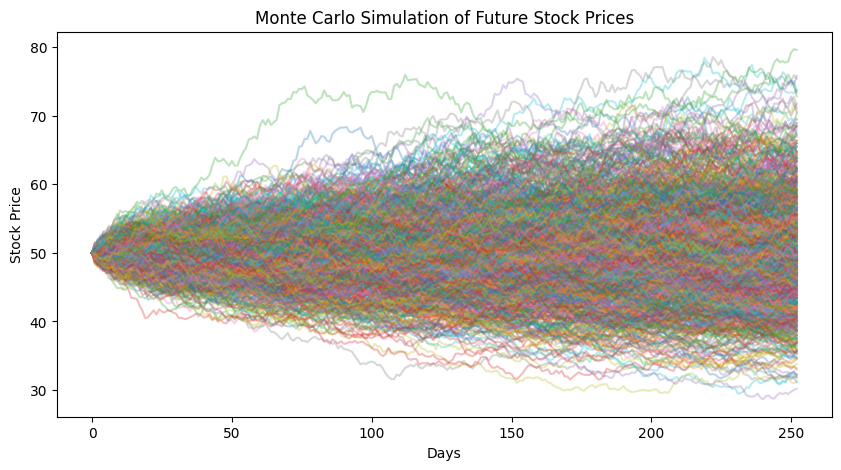

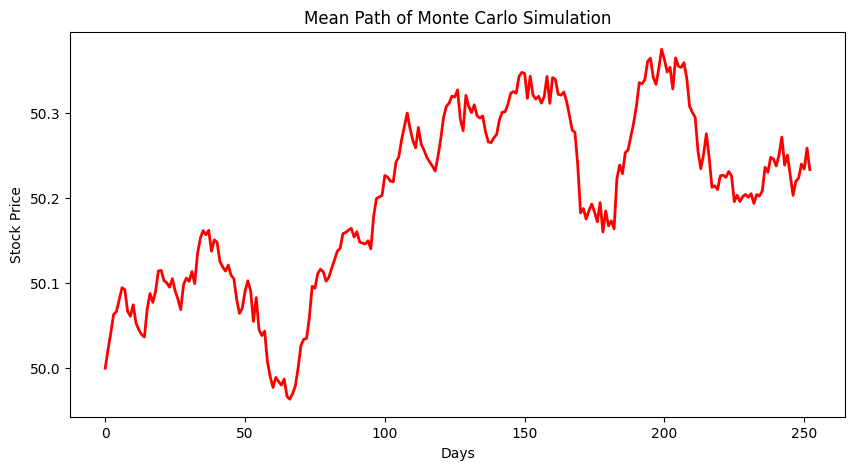

【モンテカルロシミュレーション結果】
1年後の予測株価（平均パス）：50.23


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NUM_SIMULATIONS = 1000  # シミュレーション本数


def stock_montecarlo(S0, mu, sigma, n_days, sims=NUM_SIMULATIONS):
    """
    幾何ブラウン運動（Geometric Brownian Motion）による
    株価のモンテカルロシミュレーション

    S0      : 初期株価
    mu      : 平均リターン（ドリフト項）
    sigma   : ボラティリティ（価格変動の大きさ）
    n_days  : シミュレーション日数
    sims    : シミュレーション回数（パスの本数）
    """

    results = []  # 各シミュレーションパスを保存

    for _ in range(sims):

        prices = [S0]  # 初期値をセット

        for _ in range(n_days):

            prev_price = prices[-1]

            # ----------------------------
            # 1日分のGBMモデル
            # S(t+1) = S(t) * exp[(μ - 0.5σ²) + σZ]
            # Z ~ N(0,1)
            # dt = 1 と仮定（1日刻み）
            # ----------------------------
            next_price = prev_price * np.exp(
                (mu - 0.5 * sigma**2)
                + sigma * np.random.normal(0, 1)
            )

            prices.append(next_price)

        results.append(prices)

    # DataFrame化
    # 行：時間（0日目〜n日目）
    # 列：各シミュレーションパス
    df = pd.DataFrame(results).T

    return df


# ===============================
# メイン処理
# ===============================

# --- パラメータ設定 ---
S0 = 50        # 初期株価
mu = 0.00002   # 日次平均リターン（小さい値）
sigma = 0.01   # 日次ボラティリティ
n_days = 252   # 1年分の営業日

# --- シミュレーション実行 ---
sim_data = stock_montecarlo(S0, mu, sigma, n_days)

# ----------------------------
# すべてのパスを描画
# ----------------------------
sim_data.plot(
    legend=False,
    figsize=(10, 5),
    alpha=0.3
)

plt.title("Monte Carlo Simulation of Future Stock Prices")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()

# ----------------------------
# 平均パスの計算
# ----------------------------
sim_data["mean"] = sim_data.mean(axis=1)

# 平均パスを描画
sim_data["mean"].plot(
    figsize=(10, 5),
    color="red",
    linewidth=2
)

plt.title("Mean Path of Monte Carlo Simulation")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()

# ----------------------------
# 1年後の予測値（平均パス）
# ----------------------------
prediction = sim_data["mean"].iloc[-1]

print("【モンテカルロシミュレーション結果】")
print(f"1年後の予測株価（平均パス）：{prediction:.2f}")


---

## 4. シミュレーション結果の見方

- **細い線**：多数の株価パス（将来の不確実なシナリオ）
- **平均線（mean）**：各時点の期待値 $\mathbb{E}[S_t]$
- **重要なのは「1本の予測」ではなく「分布」**
  - 例：1年後の平均
  - 例：中央値（50%点）
  - 例：5%・95%分位点（下振れ／上振れの範囲）

---

## 5. この方法の利点と注意点

### 利点
- 解析的に解けない問題も数値的に近似できる  
- $\sigma$ を変えることでリスクシナリオを作れる  
- Black–Scholes と同じ GBM 仮定のもとで整合的に議論できる  

### 注意点
- $\mu$ と $\sigma$ の推定に強く依存する  
- 出力は「確率分布」であり、保証された予測ではない  
- 試行回数を増やすと精度は上がるが計算量も増える  

---

## 6. まとめ

- 株価は GBM でモデル化できる  
- 解析解（指数形）を使えばモンテカルロシミュレーションが可能  
- モンテカルロ法は「未来の1本の線」ではなく、**未来の分布（期待値・分位点・リスク）を評価する手法**である  
- Python では数十行で実装できる